# Analise de terremotos em Taiwan

### Taiwan (chinês tradicional: 臺灣 ou 台灣, chinês simplificado: 台湾), oficialmente República da China, é um Estado insular localizado na Ásia Oriental, que evoluiu de um regime unipartidário com reconhecimento mundial e jurisdição plena sobre toda a China para uma república com reconhecimento internacional limitado e com competência apenas sobre a ilha Formosa e outras ilhas menores, apesar de usufruir de relações de facto com muitos outros países. (Wikipedia)

 Passo 1: No site https://scweb.cwa.gov.tw/en-us/earthquake/data/ existem registros de terremotos desde 1995, entretanto, para cada mês de cada ano há que se baixar um CSV diferente. Para automatizar o trabalho, irei utilizar a biblioteca pyautogui da seguinte forma. Irei anotar as coordenadas de cada botão usando pyautogui.position e depois irei criar um loop para automatizar o download de cada arquivo CSV.
   

In [3]:
# pip install pyautogui

Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd
import pyautogui
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [5]:

#try:
#    while True:
        # Localiza a posicao do mouse
#        x, y = pyautogui.position()
        
        # Printa a posicao
#        print('Mouse position: X = {}, Y = {}'.format(x, y))
        
        # Ajustando tempo de sleep antes de coletar nova posicao
#        pyautogui.sleep(1)
#except KeyboardInterrupt:
#    print('\nExiting...')

In [6]:
#pyautogui.pause = 2
#while True:
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1221,y=484) #botao janeiro
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1278, y = 477) #botao fev
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1343, y = 483) # botao mar
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1404, y = 452) # botao abril
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1216, y = 555) # botao maio
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1280, y = 549) # botao junho
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1340, y = 552) # botao julho
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1405, y = 561) # botao agosto
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1216, y = 629) # botao setembro
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1278, y = 626) # botao outubro
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1346, y = 621) # botao novembro
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1407, y = 622) # botao Dezembro
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1419,y=431) #botao prosseguir
#    time.sleep(0.2)

Com todos as 357 tabelas em mãos, juntei e limpei todas elas em um unico dataframe usando PowerBI e Python.

No PowerBI:
- Fundi as 357 tabelas em uma única
- Eliminei as colunas numero e local
- Atribuí os nomes das colunas como headers
- Eliminei as linhas que tinham os nomes repetidos das colunas
No Python:
- Acabei de notar que eu esqueci de eliminar a coluna Location, isso será feito agora
- Separei a coluna 'Orgin date' nas colunas de data e hora

O resultado final foi atribuído a uma variável chamada tremores

In [7]:
tremores = pd.read_csv(r"C:\Users\alvar\OneDrive\Área de Trabalho\Earthquakes\Earthquakes compiled.csv")

In [8]:
tremores.head()

,Orgin date,Location,Latitude(N),Longitude(E),Magnitude,Depth
0,2008-06-01 09:57:15,19.45N 121.10E,19.4500,121.100,6.4,41.9
1,2013-09-06 19:33:51,20.05N 122.28E,20.0500,122.280,6.8,206.2
2,2000-07-16 11:21:47,20.51N 122.23E,20.5100,122.230,6.7,33.0
3,2020-04-11 00:44:57,20.54N 122.17E,20.5400,122.170,6.5,179.4
4,2023-08-13 09:43:10,20.55N 121.47E,20.5523,121.473,6.0,84.0


In [9]:
tremores.drop('Location', axis=1, inplace=True)

In [10]:
tremores['Orgin date'] = pd.to_datetime(tremores['Orgin date'])

# Create new columns for date and time
tremores['Date'] = tremores['Orgin date'].dt.date
tremores['Time'] = tremores['Orgin date'].dt.time
tremores.drop('Orgin date', axis=1, inplace=True)

In [11]:
tremores.head()

,Latitude(N),Longitude(E),Magnitude,Depth,Date,Time
0,19.4500,121.100,6.4,41.9,2008-06-01,09:57:15
1,20.0500,122.280,6.8,206.2,2013-09-06,19:33:51
2,20.5100,122.230,6.7,33.0,2000-07-16,11:21:47
3,20.5400,122.170,6.5,179.4,2020-04-11,00:44:57
4,20.5523,121.473,6.0,84.0,2023-08-13,09:43:10


In [12]:
tremores.sort_values(by='Date', inplace=True)

In [13]:
tremores.head()

,Latitude(N),Longitude(E),Magnitude,Depth,Date,Time
13584,24.96,121.70,4.5,91.5,1995-01-05,06:14:55
4502,23.68,121.43,5.1,3.8,1995-01-10,15:55:19
3071,23.30,120.76,4.5,14.3,1995-01-19,19:39:08
1754,23.05,120.19,4.2,16.0,1995-01-24,16:45:23
5026,23.76,121.92,5.2,24.6,1995-02-10,10:21:59


In [14]:
tremores = tremores[["Date","Time","Latitude(N)","Longitude(E)", "Magnitude", "Depth"]]
tremores.head()

,Date,Time,Latitude(N),Longitude(E),Magnitude,Depth
13584,1995-01-05,06:14:55,24.96,121.70,4.5,91.5
4502,1995-01-10,15:55:19,23.68,121.43,5.1,3.8
3071,1995-01-19,19:39:08,23.30,120.76,4.5,14.3
1754,1995-01-24,16:45:23,23.05,120.19,4.2,16.0
5026,1995-02-10,10:21:59,23.76,121.92,5.2,24.6


### Com o dataset organizado como gostaria, é hora de aplicar algumas estatísticas descritivas para entendê-lo

In [15]:
tremores.dtypes

Date             object
Time             object
Latitude(N)     float64
Longitude(E)    float64
Magnitude       float64
Depth           float64
dtype: object

In [16]:
tremores.describe()

,Latitude(N),Longitude(E),Magnitude,Depth
count,13671.000000,13671.000000,13671.000000,13671.000000
mean,23.823012,121.452237,3.705925,19.006839
std,0.655277,0.507765,0.746579,19.253892
min,19.450000,117.980000,1.300000,0.100000
25%,23.410000,121.220000,3.200000,8.700000
50%,23.990000,121.580000,3.600000,13.600000
75%,24.260000,121.750000,4.100000,21.500000
max,25.970000,125.510000,7.200000,312.000000


In [17]:
tremores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13671 entries, 13584 to 9468
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          13671 non-null  object 
 1   Time          13671 non-null  object 
 2   Latitude(N)   13671 non-null  float64
 3   Longitude(E)  13671 non-null  float64
 4   Magnitude     13671 non-null  float64
 5   Depth         13671 non-null  float64
dtypes: float64(4), object(2)
memory usage: 747.6+ KB


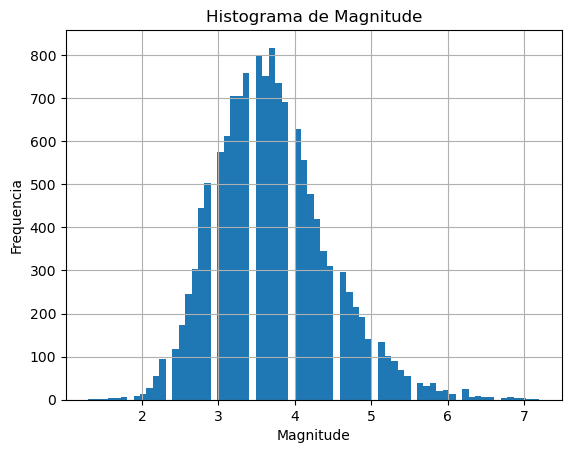

In [60]:
tremores.hist(column='Magnitude', bins=70)  
plt.xlabel('Magnitude')
plt.ylabel('Frequencia')
plt.title('Histograma de Magnitude')
plt.show()


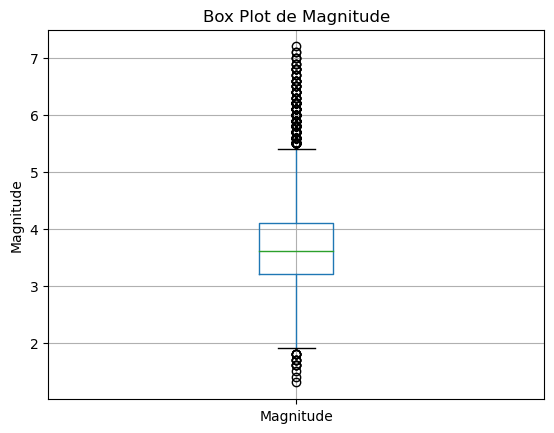

In [59]:
tremores.boxplot(column='Magnitude')
plt.ylabel('Magnitude')
plt.title('Box Plot de Magnitude')
plt.show()

Os graficos acima demonstram uma distribuição quase normal, enviesado para a esquerda e uma quantidade razoável de outliers, de modo que não me parece fazer sentido removê-los

### A partir de aqui irei tentar procurar padrões nos dados através de gráficos

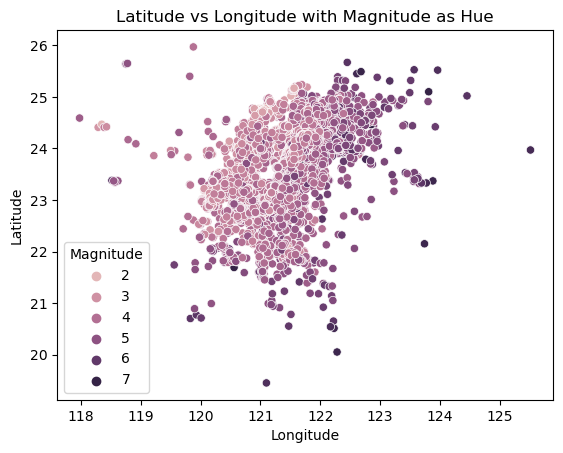

In [65]:
import seaborn as sns

# Assuming your data is stored in a DataFrame called 'data'
sns.scatterplot(x='Longitude(E)', y='Latitude(N)', hue='Magnitude', data=tremores)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude with Magnitude as Hue')
plt.legend(title='Magnitude')
plt.show()

Conclusões: Me parece que a costa leste tem tremores mais fortes

## Plotando gráficos para buscar padrões

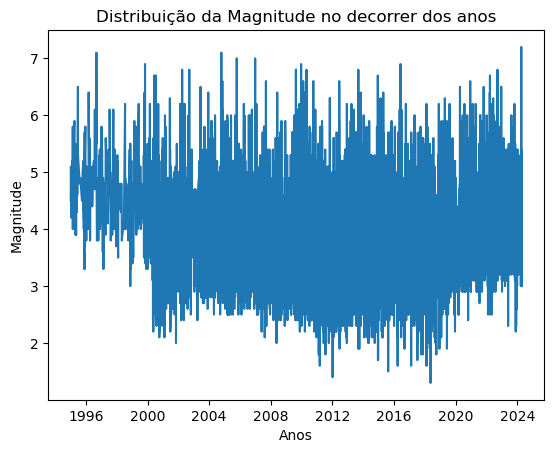

In [70]:

plt.plot(tremores['Date'], tremores['Magnitude'])
plt.xlabel('Anos')
plt.ylabel('Magnitude')
plt.title('Distribuição da Magnitude no decorrer dos anos')
plt.show()

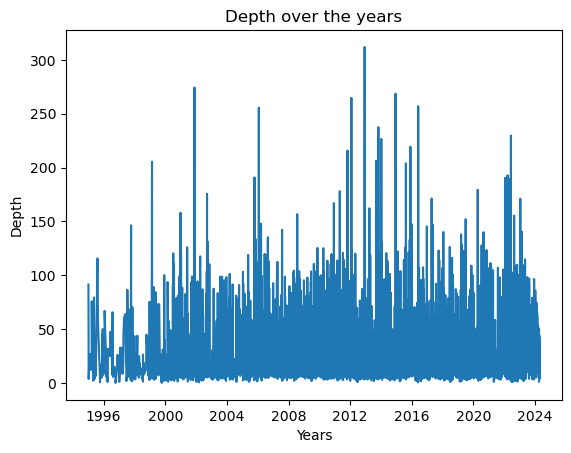

In [21]:
plt.plot(tremores['Date'], tremores['Depth'])
plt.xlabel('Anos')
plt.ylabel('Profundidade')
plt.title('Profundidade no decorrer dos anos')
plt.show()

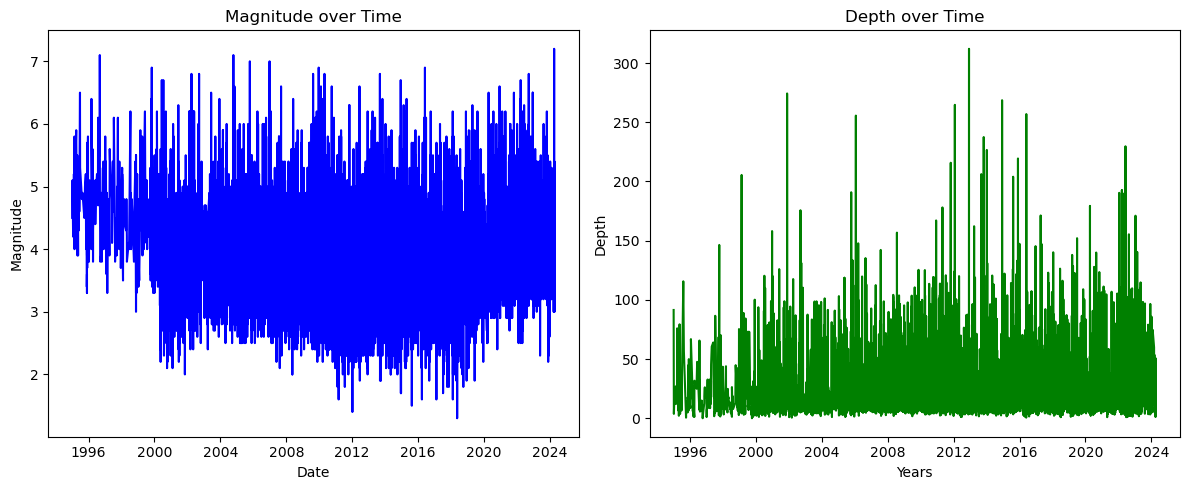

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Magnitude x Tempo
axes[0].plot(tremores['Date'], tremores['Magnitude'], color='blue')
axes[0].set_xlabel('Anos')
axes[0].set_ylabel('Magnitude')
axes[0].set_title('Magnitude x Anos')

# Profundidade vs Tempo
axes[1].plot(tremores['Date'], tremores['Depth'], color='green')
axes[1].set_xlabel('Anos')
axes[1].set_ylabel('Profundidade')
axes[1].set_title('Profundidade x Anos')

plt.tight_layout()  
plt.show()

In [36]:
correlation = tremores['Depth'].corr(tremores['Magnitude'])
print("Correlação entre Depth e Magnitude:", correlation)

Correlação entre Depth e Magnitude: 0.4085125495596888


A correlação de 0.4 é positiva e moderada.

Analisando a curva Magnitude, me parece que ela encaixa numa curva senoidal

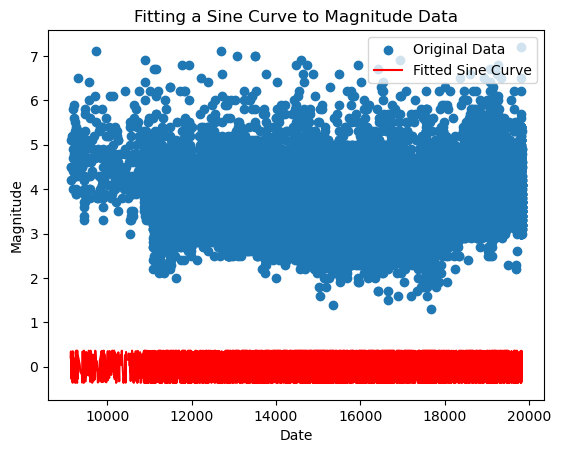

In [26]:
from matplotlib.dates import date2num

# Convert 'Date' column to datetime format
tremores['Date'] = pd.to_datetime(tremores['Date'])

# Convert datetime to numeric using matplotlib's date2num function
x = date2num(tremores['Date'])
y = tremores['Magnitude']

# Define the function to fit (sine function)
def sine_function(x, a, b, c):
    return a * np.sin(b * x + c)

# Fit the sine function to the data
popt, pcov = curve_fit(sine_function, x, y)

# Plot the original data and the fitted sine curve
plt.scatter(x, y, label='Original Data')
plt.plot(x, sine_function(x, *popt), color='red', label='Fitted Sine Curve')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Fitting a Sine Curve to Magnitude Data')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import r2_score

# Calculate predicted values using the fitted model
predicted_y = sine_function(x, *popt)

# Calculate R^2 score
r_squared = r2_score(y, predicted_y)
print("R^2 Score:", r_squared)

R^2 Score: -24.524169357538455


Este resultado significa que uma simples curva seno é bem incapaz de modelar terremotos

Meu próximo passo é tentar uma regressão linear

In [37]:
x = tremores[['Magnitude']]
y = tremores['Depth']
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.6)



In [38]:
linear = LinearRegression()

In [39]:
linear.fit(x_train, y_train)

LinearRegression()

In [40]:
y_pred = linear.predict(x_test)

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error (MAE)
LinearRegression_MAE = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
LinearRegression_MSE = mean_squared_error(y_test, y_pred)

# Coefficient of Determination (R^2)
LinearRegression_R2 = r2_score(y_test, y_pred)

In [48]:
print("MAE:", LinearRegression_MAE)
print("MSE:", LinearRegression_MSE)
print("R2:", LinearRegression_R2)

MAE: 10.768933092893006
MSE: 312.9673021681621
R2: 0.1666268655492681


A proxima tentativa é usar kNN e ver se o modelo melhora

Checando o melhor k

In [50]:
# Choosing k range from 1 to 70
k_value_min = 1
k_value_max = 70

# Create a list of integer k values between k_value_min and 
# k_value_max using linspace
k_list = np.linspace(k_value_min,k_value_max,num=70,dtype=int)

C:\Users\alvar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\alvar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\alvar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


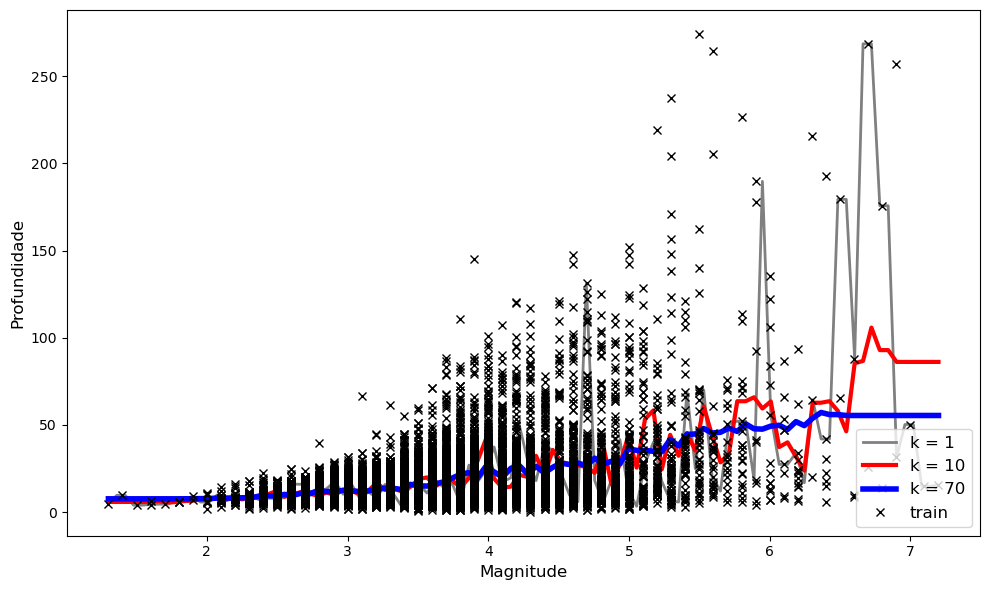

In [57]:
# Setup a grid for plotting the data and predictions
fig, ax = plt.subplots(figsize=(10, 6))

# Create a dictionary to store the k value against MSE fit {k: MSE@k}
knn_dict = {}

# Variable used for altering the linewidth of values kNN models
j = 0

# Define the colors list
colors = ['grey', 'r', 'b']

# Loop over all k values
for k_value in k_list:

    # Create a KNN Regression model for the current k
    model = KNeighborsRegressor(n_neighbors=int(k_value))

    # Fit the model on the train data
    model.fit(x_train, y_train)

    # Use the trained model to predict on the test data
    y_pred = model.predict(x_test)

    # Calculate the MSE of the test data predictions
    MSE = mean_squared_error(y_test, y_pred)

    # Store the MSE values of each k value in the dictionary
    knn_dict[k_value] = MSE

    # Helper code to plot the data and various kNN model predictions
    if k_value in [1, 10, 70]:
        xvals = np.linspace(x_train.min(), x_train.max(), 100)
        ypreds = model.predict(xvals.reshape(-1, 1))
        ax.plot(xvals, ypreds, '-', label=f'k = {int(k_value)}', linewidth=j + 2, color=colors[j])
        j += 1

# Plotting the training data points
ax.plot(x_train, y_train, 'x', label='train', color='k')

# Adding labels and legend
ax.legend(loc='lower right', fontsize=12)
ax.set_xlabel('Magnitude', fontsize=12)
ax.set_ylabel('Profundidade', fontsize=12)

plt.tight_layout()
plt.show()

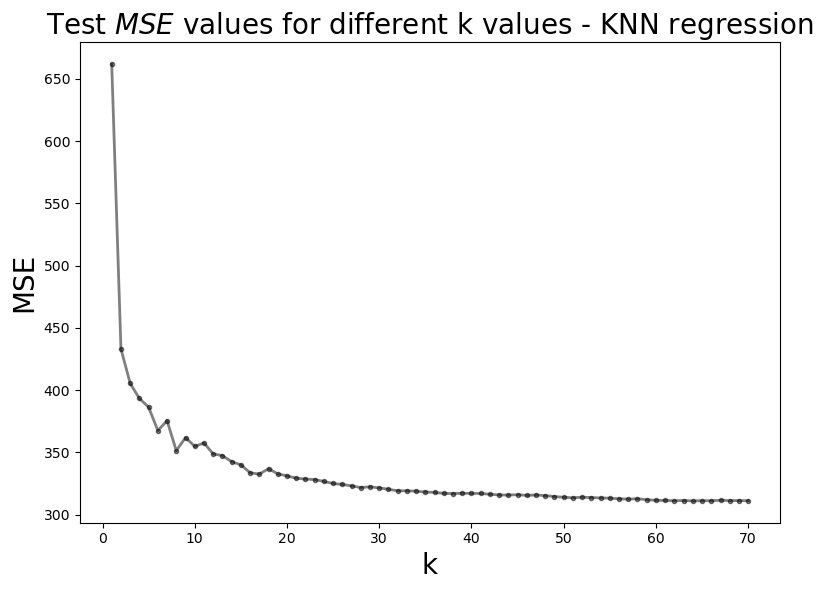

In [52]:
# Plot a graph which depicts the relation between the k values and MSE
k_values = list(knn_dict.keys())
mse_values = list(knn_dict.values())
plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_values, 'k.-', alpha=0.5, linewidth=2)

# Set the title and axis labels
plt.xlabel('k', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.title('Test $MSE$ values for different k values - KNN regression', fontsize=20)
plt.tight_layout()
plt.show()

In [53]:
# Find the lowest MSE among all the kNN models
min_mse = min(mse_values)

# Use list comprehensions to find the k value associated with the lowest MSE
best_model = [k_value for k_value, MSE in knn_dict.items() if MSE == min_mse]

# Print the best k-value
print("The best k value is", best_model, "with a MSE of", min_mse)


The best k value is [64] with a MSE of 311.0662775152601


Agora que temos definido o melhor k, iremos usa-lo para treinar nosso modelo

In [54]:
KNN = KNeighborsRegressor(n_neighbors=64)

# Train the model using the training data
KNN.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=64)

In [55]:
predictions = KNN.predict(x_test)

In [67]:
# Mean Absolute Error (MAE)
KNeighborsRegressor_MAE = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
KNeighborsRegressor_MSE = mean_squared_error(y_test, y_pred)

# Coefficient of Determination (R^2)
KNeighborsRegressor_R2 = r2_score(y_test, y_pred)

print("MAE:", KNeighborsRegressor_MAE)
print("MSE:", KNeighborsRegressor_MSE)
print("R2:", KNeighborsRegressor_R2)

MAE: 10.618093932032496
MSE: 311.24361720457796
R2: 0.17121671481133538


In [69]:
from tabulate import tabulate

# Create a dictionary to hold the evaluation metrics
evaluation_data = {
    "Model": ["Linear Regression", "K-Nearest Neighbors"],
    "MAE": [LinearRegression_MAE, KNeighborsRegressor_MAE],
    "MSE": [LinearRegression_MSE, KNeighborsRegressor_MSE],
    "R^2": [LinearRegression_R2, KNeighborsRegressor_R2]
}

# Convert the dictionary to a DataFrame
evaluation_df = pd.DataFrame(evaluation_data)

# Display the DataFrame
print(tabulate(evaluation_df, headers='keys', tablefmt='pretty'))

+---+---------------------+--------------------+--------------------+---------------------+
|   |        Model        |        MAE         |        MSE         |         R^2         |
+---+---------------------+--------------------+--------------------+---------------------+
| 0 |  Linear Regression  | 10.768933092893006 | 312.9673021681621  | 0.1666268655492681  |
| 1 | K-Nearest Neighbors | 10.618093932032496 | 311.24361720457796 | 0.17121671481133538 |
+---+---------------------+--------------------+--------------------+---------------------+


Conclusão: O kNN faz um trabalho melhor de previsão, ainda que muito ruim